# Implement Vanilla Gradient Descent on MSE loss




### PROLOGUE: 
Gradient Descent is where the magic happens and this optimization algorithm is used in  many ML/DL algorithms such as Linear Regression, Logistic Regression , SVM & Neural Networks.We seldom have to implement this algorithm oursleves because the libraries implement it under the hood.

Inspite of being a fundamental concept in ML , this has always been a daunting concept , especially for beginners. Theortically  it involves  Calculus and Vector Algebra but how does it all pan out in terms of code ? Implementing the  Gradient Descent algorithm helps one understand this algorithm at a granular level.



### PROJECT OBJECTIVE: 
To implement Gradient Decsent on MSE Loss function from a neural network perspective


### CODE/SOLUTION SUMMARY
We will be finding the best fit line on the given data set using Gradient Decsent i.e we will be implementing gradient decsent on the MSE loss function.Below is the step wise breakdown of the code
- We will begin by manually creating a 2D data set & visualize the data set
- Note here that at this point , we already know what the best fit line for this data looks like.
- We will then implement Gradient Descent & see whether we can arrive at this best fit line through the gradient Descent algorithm
- We start at random point and and iteratvely keep reducing the loss until we arrive at the best fit line
- Cross vaidate whether the "best fit" line we arrived at through gradient decsnt is indeed the best fit line.
- We will realize all the operations in matrix format because we are implemting this from a neural network perspective 

In [176]:
# Import  libraries

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(101)

In [177]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [178]:
# Lets create a  2 D data set manually

X=np.arange(2,20,2)
Y=2*X + 3

In [179]:
X

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [180]:
Y

array([ 7, 11, 15, 19, 23, 27, 31, 35, 39])

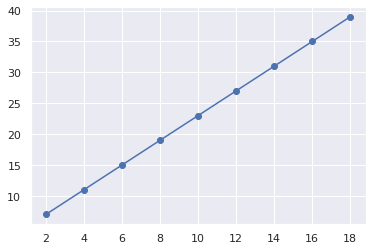

In [181]:
# Lets visualize the Actual Data Set

plt.scatter(x=X,y=Y)
plt.plot(X,Y,c='b')
plt.show()

In [182]:
# Cool , so we now know that the best fit line is y=2x+3 , because we created it 
# We could think of this as a toy data set because in reality we never data points that actually fall on one line .
# However , for the objective of this notebook , its convenient.
# We have plotted both the points and the line above 
# Lets see if gradient descent can arrive at the same line 

In [183]:
# Note :
# Variables naming convention
# We have used small letters for scalars and CAPS for Vectors

In [184]:
# Lets define our loss function 

def MSE(Y_True,Y_Pred):
  loss=np.sum(np.square(Y_Pred-Y_True))/Y_True.shape[0]
  return loss


In [185]:
# Lets define our linear function
def linearFunc(X,W):
  Y=W[0]*X +  W[1]
  return Y


In [186]:
# Start at a random weight
W=np.ones(shape=2)
W[0]=random.randint(5,10)
W[1]=random.randint(5,10)

In [187]:
print(W[0])
print(W[1])

9.0
6.0


In [188]:
# Now we have some random weights , lets visualize what the predicted line ...
# ... looks like with these weights agianst the actual line

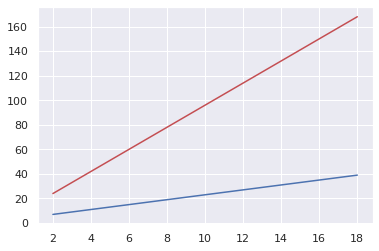

In [189]:
# Lets see what the line looks like at this point
plt.plot(X,linearFunc(X,W),c='r')# predicted line in red
plt.plot(X,Y,c='b')# actual line in blue

In [190]:
# We can see the predicted line and actual line in the above

##  Calculate Derivatives

- We would need to calculate the partial derviatives of 'm' and c(y=mx+c) which we will use later in our code
- The Derivates are calculated as below
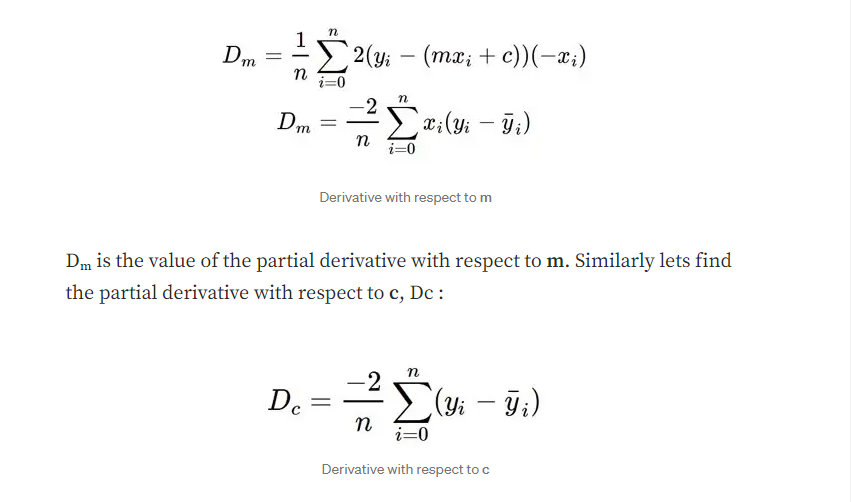

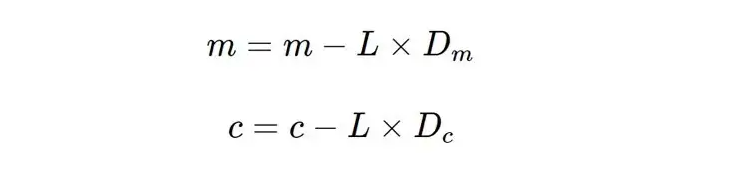

- Calculation of Derivatives above  referenced from https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 

- In the above excerpt , we have seen how we calculate derivative  of each variable in the function seperately as these are partial derivatives
- Now , take note that, we can represent the above in the form of a vector, this is merely a representation which will allow us to make computations easier for Neural Networks.
- How is this applicable to Neuarl Networks ? Each node in a neural network is a linear function.
- Since this a muti dimensional function , the derivative of such functions can be represented as a vector(where partial derivative of each variable will be one element), this is usually represented as a column vector in theory.
- In our code , we will represent this as vector named grad which will basically comprise of 2 elements in this case
- So Dc and Dm calculated above will be each element of that vector

In [191]:
# Lets write a func to calculate these gradients
'''Make note that we will be calcuating gradient at different points on the loss function as we try to make ...
our way to the minima for every combination of weighst(m & c) that we are at.
Therefore the gradient function will take inputs as X(Input data points), Y(Actual Values), P(Predicted Values) and give us 
the corresponding gradients of 'm' and 'c' at that point '''

def grad(X,Y,P):
  '''Note here that we are going to realise this operation of calcuating gradient as one singly operation ...
  insetad of doing seperately for m anc c. The final gradient will be a vector where one element corresponds to m ...
  and one to c . So we will use the formula summation xi(y-yi) to calcuate both derivatives .Note only one of them had x into...
  so just to make up for that we will add a dummy layer of 1's in the x part of that deriative which does not have x multiplied ...
  with y-yi which for derivative of c because we canot do a multiplication op otherwise'''
  
  # add  a dummy layer of 1 's 
  X1=np.vstack((np.ones_like(X),X))

  #calculate term in derivative which we will need later
  E=P-Y

  #calculate number of samples 
  N=np.shape(X)[0]

  #Calculate gradient 
  G=-1/N*(X.dot(E))

  return G

"Make note that we will be calcuating gradient at different points on the loss function as we try to make ...\nour way to the minima for every combination of weighst(m & c) that we are at.\nTherefore the gradient function will take inputs as X(Input data points), Y(Actual Values), P(Predicted Values) and give us \nthe corresponding gradients of 'm' and 'c' at that point "

##  Implement Gradient Descent for 1 iteration

In [192]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


In [193]:
# Lets use LR as 0.0001
lr=0.001

# Lets do one iteration and of GD and view results

P=linearFunc(X,W)     #Prediction with current weights
gradient=grad(X,Y,P)  #Calculate the gradient at this point

#Lets update the weights 
W1=W + lr*gradient

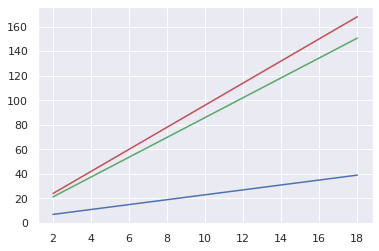

In [194]:
# Now lets plot orginal line , random line & line after first iteration in one graph

# Lets see what the line looks like at this point
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,linearFunc(X,W1),c='g')#  line after one iteration in green
plt.plot(X,Y,c='b')# actual line in blue

# Neat , we can see it took a tiny step towards the best fit line , lets proceed

##  Implement Gradient Descent in its entirity

In [195]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


currLoss 4945.358796296297
deltaLoss 1690.3078703703695


currLoss 3685.6660453446507
deltaLoss 1259.6927509516468


currLoss 2746.9068079628155
deltaLoss 938.7592373818352


currLoss 2047.333661935863
deltaLoss 699.5731460269526


currLoss 1526.0193426710325
deltaLoss 521.3143192648304


currLoss 1137.5544023299867
deltaLoss 388.4649403410458


currLoss 848.0951903689262
deltaLoss 289.45921196106053


currLoss 632.418281688975
deltaLoss 215.67690867995123


currLoss 471.7250489219523
deltaLoss 160.69323276702266


currLoss 352.00534530038584
deltaLoss 119.71970362156645


currLoss 262.8179130235772
deltaLoss 89.18743227680864


currLoss 196.38139179641846
deltaLoss 66.43652122715875


currLoss 146.89682814843428
deltaLoss 49.484563647984174


currLoss 110.04272969577002
deltaLoss 36.85409845266426


currLoss 82.59872233361028
deltaLoss 27.444007362159738


currLoss 62.16505876362026
deltaLoss 20.433663569990024


currLoss 46.95356742984197
deltaLoss 15.21149133377829


currLoss 35.6318475675956
deltaLoss 11.321719862246368


currLoss 27.207149566817016
deltaLoss 8.424698000778584


currLoss 20.939833372570135
deltaLoss 6.267316194246881


currLoss 16.27887168261056
deltaLoss 4.660961689959574


currLoss 12.813783223906603
deltaLoss 3.465088458703958


currLoss 10.238811330546538
deltaLoss 2.5749718933600647


currLoss 8.326228827098225
deltaLoss 1.9125825034483128


currLoss 6.906444581590896
deltaLoss 1.419784245507329


currLoss 5.853179151814625
deltaLoss 1.0532654297762711


currLoss 5.072418226238444
deltaLoss 0.7807609255761809


currLoss 4.494181455446032
deltaLoss 0.5782367707924116


currLoss 4.066389401792447
deltaLoss 0.42779205365358486


currLoss 3.7502940357468373
deltaLoss 0.31609536604561006


currLoss 3.517074376454611
deltaLoss 0.2332196592922262


currLoss 3.3453003617908044
deltaLoss 0.1717740146638067


currLoss 3.2190436720803604
deltaLoss 0.12625668971044401


currLoss 3.1264706048812667
deltaLoss 0.09257306719909364


currLoss 3.0587941123995304
deltaLoss 0.06767649248173635


currLoss 3.0094934252914958
deltaLoss 0.04930068710803459


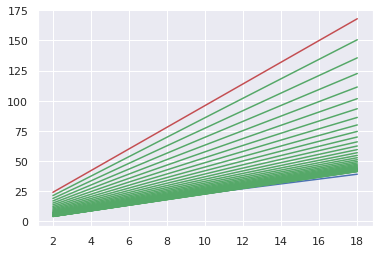

In [196]:
# Lets use LR as 0.0001
lr=0.001
totalIterCount=100 # Total no of iterations allowed
itercount=0 #Current iteration number
lossThresh=0.05
deltaLoss=5  # Intially we set an arbitrary value greater than lossThresh
P=linearFunc(X,W)
initLoss=MSE(Y,P) # This is loss with current weights

# Lets plot the actual line and initial line 
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,Y,c='b')# actual line in blue


# We will now do multiple iterations
# Stopping condition ? Either max iterations are reached or the loss is not reducing beyond a fixed threshold

while(True):
  if(itercount>=200):
    break
  if(deltaLoss <= lossThresh):
    break
  else:
    W=W + lr*gradient
    P=linearFunc(X,W)     #Prediction with current weights
    gradient=grad(X,Y,P)  #Calculate the gradient at this point
    currLoss=MSE(Y,P)     #Lets update the weights 
    print('currLoss',currLoss)
    deltaLoss=initLoss-currLoss  # Calculate diff in loss
    print('deltaLoss',deltaLoss)
    initLoss=currLoss
    itercount=itercount+1
    plt.plot(X,linearFunc(X,W),c='g')#  line after one iteration in green



##  Result
- As can be seen in the graph above , the gradient descent algorithm was able to reach the best fit line through an iterative process
- Each green line indicates one iteration
- Vanilla Gradient descent took 36 iterations to reach the best fit line i.e minima of the loss curve
- In future notebooks we can exploer how adding momentum to gradient descent can help with faster convergence 

In [197]:
currLoss

3.0094934252914958

In [198]:
deltaLoss

0.04930068710803459

In [199]:
itercount

36

In [200]:
W

array([ 2.32648748, -0.67351252])

##  References
- The following references were used while creating this notebook:

- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 by Adarsh Menon

- Post Graduation AI/ML Study Material by GL/UAT
